# Machine Learning Crash Course
## Bornhack 2019

ModuleNotFoundError: No module named 'keras'

In [2]:
# Tell Tensorflow to use no more GPU RAM than necessary
limit_mem()

W0715 17:27:57.578668 4533134784 deprecation_wrapper.py:119] From /Users/mateuszjurewicz/Bornhack ML Crashcourse/bornhack_ml_crashcourse/bornhack_venv/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0715 17:27:57.579982 4533134784 deprecation_wrapper.py:119] From /Users/mateuszjurewicz/Bornhack ML Crashcourse/bornhack_ml_crashcourse/bornhack_venv/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0715 17:27:57.580914 4533134784 deprecation_wrapper.py:119] From /Users/mateuszjurewicz/Bornhack ML Crashcourse/bornhack_ml_crashcourse/bornhack_venv/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:186: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0715 17:27:57.595685 4533134784 deprecation_wrapper.py:119] From /Users/mate

In [3]:
path = './data/train/'

In [4]:
fnames = glob.glob(path+'**/*.JPEG', recursive=True)
n = len(fnames); n

19439

In [5]:
fn = fnames[50]; fn

'./data/train/n02795169/n02795169_6950.JPEG'

In [6]:
sample_image = path + 'n01558993/n01558993_9684.JPEG'

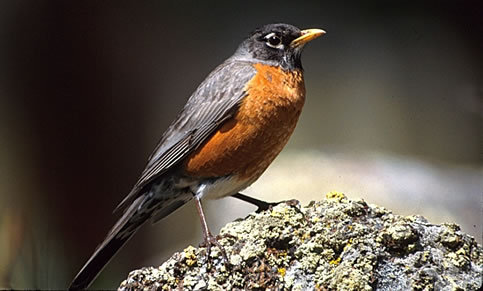

In [7]:
img=Image.open(sample_image); img

In [8]:
rn_mean = np.array([123.68, 116.779, 103.939], dtype=np.float32)
preproc = lambda x: (x - rn_mean)[:, :, :, ::-1]

In [9]:
deproc = lambda x,s: np.clip(x.reshape(s)[:, :, :, ::-1] + rn_mean, 0, 255)

In [10]:
img_arr = preproc(np.expand_dims(np.array(img), 0))
shp = img_arr.shape

### Recreate input

In [11]:
model = VGG16_Avg(include_top=False)

W0715 17:27:58.179717 4533134784 deprecation_wrapper.py:119] From /Users/mateuszjurewicz/Bornhack ML Crashcourse/bornhack_ml_crashcourse/bornhack_venv/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/Users/mateuszjurewicz/Bornhack ML Crashcourse/bornhack_ml_crashcourse/vgg16_avg.py:48: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", name="block1_conv1", padding="same")`
  x = Convolution2D(64, 3, 3, activation='relu', border_mode='same', name='block1_conv1')(img_input)
/Users/mateuszjurewicz/Bornhack ML Crashcourse/bornhack_ml_crashcourse/vgg16_avg.py:49: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", name="block1_conv2", padding="same")`
  x = Convolution2D(64, 3, 3, activation='relu', border_mode='same', name='block1_conv2')(x)
W0715 17:27:58.215754 4533134784 deprecati

In [12]:
layer = model.get_layer('block5_conv1').output

In [13]:
layer_model = Model(model.input, layer)
targ = K.variable(layer_model.predict(img_arr))

In [14]:
class Evaluator(object):
    def __init__(self, f, shp): self.f, self.shp = f, shp
        
    def loss(self, x):
        loss_, self.grad_values = self.f([x.reshape(self.shp)])
        return loss_.astype(np.float64)

    def grads(self, x): return self.grad_values.flatten().astype(np.float64)

In [15]:
loss = metrics.mse(layer, targ)
grads = K.gradients(loss, model.input)
fn = K.function([model.input], [loss]+grads)
evaluator = Evaluator(fn, shp)

In [16]:
def solve_image(eval_obj, niter, x):
    for i in range(niter):
        x, min_val, info = fmin_l_bfgs_b(eval_obj.loss, x.flatten(),
                                         fprime=eval_obj.grads, maxfun=20)
        print('x', x)
        print('min_val', min_val)
        print('info', info)
        
        x = np.clip(x, -127,127)
        print('Current loss value:', min_val)
        # TODO: add image saving
#         imsave(f'{path}/results/res_at_iteration_{i}.png', deproc(x.copy(), shp)[0])
    return x

W0715 17:27:59.363595 4533134784 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


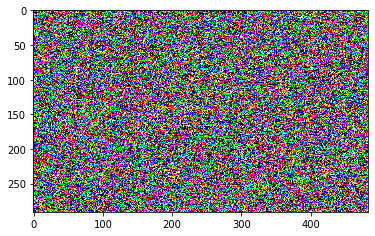

In [17]:
rand_img = lambda shape: np.random.uniform(-2.5, 2.5, shape)
x = rand_img(shp)
plt.imshow(x[0]);

In [18]:
iterations=10

In [19]:
x = solve_image(evaluator, iterations, x)

x [-1.57453867 -0.70363143  1.39343836 ... -2.13768393 -2.43631961
 -0.75373672]
min_val [[[ 41.99087143  35.41614151  35.07164383  36.70282745  37.79285049
    41.92418671  39.93843842  37.31480789  34.83811188  35.2084198
    35.62876129  35.50091171  36.27132416  45.37534332  57.61365509
    67.8829422   78.44488525  80.4159317   67.315979    73.45710754
    78.26618958  84.86518097  72.36250305  67.03560638  64.20664978
    61.10927963  63.3501358   63.9640007   58.50227737  51.04689789]
  [ 30.08187294  31.26911926  34.04188538  30.3960228   29.53973389
    29.65956497  27.15951538  24.21667099  22.6485939   23.13936615
    23.95562935  26.68338394  30.95723343  45.72486877  71.58886719
   113.23878479 215.95562744 294.60333252 230.10171509 313.03347778
   129.72224426  79.41596985  65.25699615  54.71208191  51.49111176
    49.51052094  49.45254517  48.48937607  42.44699478  39.58628845]
  [ 30.31956482  30.85181046  39.37793732  29.2321434   24.43928337
    23.31910133  22.289962

KeyboardInterrupt: 